In [1]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic mixed signals
np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

signal_1 = np.sin(2 * time)
signal_2 = np.sign(np.sin(3 * time))
signal_3 = np.random.laplace(size= samples)

S = np.c_[signal_1, signal_2, signal_3]
S += 0.2 * np.random.normal(size=S.shape)

# Mix the signals
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])
X = S.dot(A.T)  # Observed mixed signals

In [3]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Estimated sources

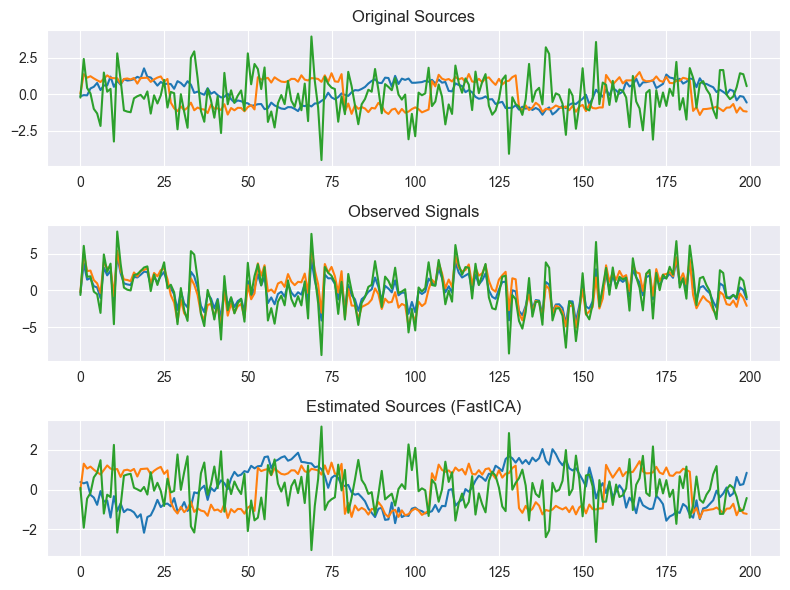

In [4]:
# Plot the results
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()